## Import Libraries

In [279]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

## Read Data

In [2]:
historical_data = pd.read_csv('historical_data.csv')
current_inventory_data = pd.read_csv('current_inventory_data.csv')
commission_table = pd.read_csv('commission_table.csv')

## Display the shape of the data

In [3]:
print('Rows and columns in historical_data are',historical_data.shape[0], ',',historical_data.shape[1])
print('Rows and columns in current_inventory_data are',current_inventory_data.shape[0], ',',current_inventory_data.shape[1])
print('Rows and columns in commission_table are',commission_table.shape[0], ',',commission_table.shape[1])

Rows and columns in historical_data are 685582 , 24
Rows and columns in current_inventory_data are 25000 , 24
Rows and columns in commission_table are 138 , 3


## Display few records

In [4]:
historical_data.head()

,Unnamed: 0,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,...,date_created,date_last_seen,price_eur,sold_flag,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,test1,test2
0,362271,ford,focus,92000.0,2006.0,1596.0,85.0,coupe,blue,NaN,...,2017-02-14 17:34:38.809116+00,2017-02-14 17:34:38.809116+00,1295.34,1,?,?,?,3,2017-02-14 17:34:38.809116+00,2017-02-14 17:34:38.809116+00
1,458002,NaN,NaN,22000.0,2013.0,1560.0,85.0,NaN,NaN,None,...,2015-12-02 09:31:25.571302+00,2015-12-14 05:16:59.23886+00,14991.67,0,62,88,1.4193,6,2015-12-02 09:31:25.571302+00,2015-12-14 05:16:59.23886+00
2,609404,volkswagen,polo,29680.0,2013.0,1197.0,66.0,other,NaN,NaN,...,2016-02-26 10:59:10.921811+00,2016-07-03 19:25:35.777411+00,12460.00,0,?,?,?,4,2016-02-26 10:59:10.921811+00,2016-07-03 19:25:35.777411+00
3,330169,skoda,NaN,22100.0,2015.0,1598.0,66.0,other,NaN,2018,...,2016-03-05 11:12:58.5208+00,2011-07-03 17:38:05.783742+00,14590.00,1,30,100,3.3333,5,2016-03-05 11:12:58.5208+00,2016-07-03 17:38:05.783742+00
4,111047,ford,transit,57690.0,2010.0,2198.0,63.0,NaN,NaN,None,...,2015-12-18 14:46:32.397086+00,2016-02-16 15:00:04.57898+00,10046.08,0,23,26,1.1304,7,2015-12-18 14:46:32.397086+00,2016-02-16 15:00:04.57898+00


In [5]:
historical_data = historical_data.drop('Unnamed: 0', axis = 1)

In [6]:
current_inventory_data.head()

,Unnamed: 0,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,...,date_created,date_last_seen,price_eur,sold_flag,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,test1,test2
0,9040,volkswagen,sharan,194000.0,1900.0,1896.0,85.0,van,blue,NaN,...,2016-12-29 16:02:25.656542+00,2017-02-09 02:10:59.686135+00,1295.34,0,24,120,5,5,2016-12-29 16:02:25.656542+00,2017-02-09 02:10:59.686135+00
1,339499,audi,200,NaN,2007.0,8400.0,NaN,other,NaN,NaN,...,2016-02-12 10:45:29.950636+00,2016-07-03 18:19:20.659466+00,12176.17,0,?,?,?,2,2016-02-12 10:45:29.950636+00,2016-07-03 18:19:20.659466+00
2,408516,skoda,octavia,0.0,2005.0,NaN,55.0,other,NaN,NaN,...,2016-12-05 17:41:06.32795+00,2016-12-18 07:55:35.445992+00,1295.34,1,38,198,5.2105,4,2016-12-05 17:41:06.32795+00,2016-12-18 07:55:35.445992+00
3,193240,mercedes-benz,NaN,6990.0,2014.0,1595.0,90.0,nan,NaN,2017,...,2016-01-26 01:58:34.274634+00,2016-02-11 07:51:10.138757+00,26880.00,0,?,?,?,3,2016-01-26 01:58:34.274634+00,2016-02-11 07:51:10.138757+00
4,409936,volkswagen,golf-sportsvan,0.0,2015.0,1395.0,92.0,other,NaN,NaN,...,2016-03-04 11:30:51.295258+00,2016-07-03 17:33:07.548746+00,26532.27,0,60,468,7.8,3,2016-03-04 11:30:51.295258+00,2016-07-03 17:33:07.548746+00


In [7]:
current_inventory_data = current_inventory_data.drop('Unnamed: 0', axis = 1)

In [8]:
commission_table.head()

,Maker,Year,Commission
0,ford,2015,0.14
1,skoda,2015,0.02
2,bmw,2015,0.14
3,suzuki,2015,0.02
4,nissan,2015,0.06


## Describe the data

In [9]:
historical_data.describe() ## Lets look into numeric values alone first

,mileage,manufacture_year,engine_displacement,engine_power,price_eur,sold_flag,no_of_pictures
count,6.156380e+05,618004.000000,542123.000000,578455.000000,6.855820e+05,685582.000000,685582.000000
mean,1.157356e+05,1990.613444,2044.020888,98.498028,4.344587e+06,0.198307,4.000106
std,3.406349e+05,90.254330,1966.525136,48.940934,3.252856e+09,0.398725,1.999587
min,0.000000e+00,0.000000,10.000000,1.000000,4.000000e-02,0.000000,1.000000
25%,1.875900e+04,2003.000000,1400.000000,68.000000,1.295340e+03,0.000000,2.000000
50%,8.630850e+04,2009.000000,1798.000000,86.000000,7.309400e+03,0.000000,4.000000
75%,1.580705e+05,2013.000000,1997.000000,110.000000,1.629482e+04,0.000000,6.000000
max,9.999999e+06,2017.000000,32000.000000,999.000000,2.679450e+12,1.000000,7.000000


###### Once thing we notice is that mean and median are not in the same range which means that data might have outliers

In [10]:
current_inventory_data.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur,sold_flag,no_of_pictures
count,2.247300e+04,22508.000000,19695.000000,21022.000000,2.500000e+04,25000.000000,25000.000000
mean,1.143223e+05,1991.681758,2046.358264,98.821520,1.270660e+04,0.195200,4.011600
std,3.240323e+05,85.509947,1946.857557,49.515002,1.391690e+05,0.396363,1.998686
min,0.000000e+00,0.000000,12.000000,6.000000,4.000000e-02,0.000000,1.000000
25%,1.890000e+04,2003.000000,1400.000000,68.000000,1.332350e+03,0.000000,2.000000
50%,8.800000e+04,2009.000000,1798.000000,87.000000,7.450000e+03,0.000000,4.000000
75%,1.582250e+05,2013.000000,1997.000000,110.000000,1.646839e+04,0.000000,6.000000
max,9.999999e+06,2017.000000,32000.000000,923.000000,2.178750e+07,1.000000,7.000000


###### Both current inventory data and historical data are distributed in the same range

In [11]:
commission_table.describe()

,Year,Commission
count,138.000000,138.000000
mean,2016.000000,0.082101
std,0.819471,0.039807
min,2015.000000,0.020000
25%,2015.000000,0.050000
50%,2016.000000,0.080000
75%,2017.000000,0.117500
max,2017.000000,0.150000


## Check for nulls

In [12]:
combined_data = pd.concat([historical_data, current_inventory_data])

In [19]:
combined_data_copy = combined_data.copy()

In [13]:
historical_data.isnull().sum()

maker                   99892
model                  218878
mileage                 69944
manufacture_year        67578
engine_displacement    143459
engine_power           107127
body_type              154511
color_slug             645305
stk_year               330100
transmission           143143
door_count             119083
seat_count             145103
fuel_type              357060
date_created                0
date_last_seen              0
price_eur                   0
sold_flag                   0
height_of_picture           0
width_of_picture            0
aspect_ratio                0
no_of_pictures              0
test1                       0
test2                       0
dtype: int64

In [14]:
current_inventory_data.isnull().sum()

maker                   3598
model                   8029
mileage                 2527
manufacture_year        2492
engine_displacement     5305
engine_power            3978
body_type               5763
color_slug             23517
stk_year               11921
transmission            5228
door_count              4258
seat_count              5272
fuel_type              12921
date_created               0
date_last_seen             0
price_eur                  0
sold_flag                  0
height_of_picture          0
width_of_picture           0
aspect_ratio               0
no_of_pictures             0
test1                      0
test2                      0
dtype: int64

In [15]:
combined_data.isnull().sum()

maker                  103490
model                  226907
mileage                 72471
manufacture_year        70070
engine_displacement    148764
engine_power           111105
body_type              160274
color_slug             668822
stk_year               342021
transmission           148371
door_count             123341
seat_count             150375
fuel_type              369981
date_created                0
date_last_seen              0
price_eur                   0
sold_flag                   0
height_of_picture           0
width_of_picture            0
aspect_ratio                0
no_of_pictures              0
test1                       0
test2                       0
dtype: int64

In [16]:
commission_table.isnull().sum()

Maker         0
Year          0
Commission    0
dtype: int64

## Missing value treatment

In [24]:
def update_missing_values_maker_wise(df, column, value):
    print(column)
    if value == 0:
        print('number')
        for i in df['maker'].unique():
            if str(df[df['maker'] == i][column].median()) == 'nan':
                df.loc[df['maker'] == i,column] = df[df['maker'] == i][column].fillna(df[column].median())
            else:
                df.loc[df['maker'] == i,column] = df[df['maker'] == i][column].fillna(df[df['maker'] == i][column].median())
    else:
        print('string')
        for i in df['maker'].unique():
            df.loc[df['maker'] == i,column] = df[df['maker'] == i][column].fillna(df[df['maker'] == i][column].value_counts().index[0])
    return df

In [25]:
def update_missing(df):
    df['body_type'] = df['body_type'].str.strip()
    df['height_of_picture'] = df['height_of_picture'].str.strip()
    df['width_of_picture'] = df['width_of_picture'].str.strip()
    df['aspect_ratio'] = df['aspect_ratio'].str.strip()
    df = df.replace({'None': np.nan, '?' : np.nan})
    
    df['maker'].fillna('Unknown maker', inplace = True)
    df['model'].fillna('Unknown model', inplace = True)
    df['manufacture_year'].fillna(0, inplace = True) # 0 means unknown year
    df['body_type'].fillna('other', inplace = True)
    df['height_of_picture'].fillna(df['height_of_picture'].median(), inplace = True)
    df['width_of_picture'].fillna(df['width_of_picture'].median(), inplace = True)
    df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace = True)
    df.drop('color_slug', axis = 1, inplace = True)
    df.drop('stk_year', axis = 1, inplace = True)

    df = update_missing_values_maker_wise(df, 'mileage',  0)
    df = update_missing_values_maker_wise(df, 'engine_displacement', 0)
    df = update_missing_values_maker_wise(df, 'engine_power', 0)
    df = update_missing_values_maker_wise(df, 'transmission', 1)
    df = update_missing_values_maker_wise(df, 'door_count', 1)
    df = update_missing_values_maker_wise(df, 'seat_count', 1)
    df = update_missing_values_maker_wise(df, 'fuel_type', 1)

    df['height_of_picture'] = df['height_of_picture'].astype(float)
    df['width_of_picture'] = df['width_of_picture'].astype(float)
    df['aspect_ratio'] = df['aspect_ratio'].astype(float)
    df['door_count'] = df['door_count'].astype(int)
    df['seat_count'] = df['seat_count'].astype(int)
    
    return df

In [26]:
combined_data = update_missing(combined_data)

mileage
number
engine_displacement
number
engine_power
number
transmission
string
door_count
string
seat_count
string
fuel_type
string


## Outlier

<AxesSubplot:xlabel='aspect_ratio', ylabel='Density'>

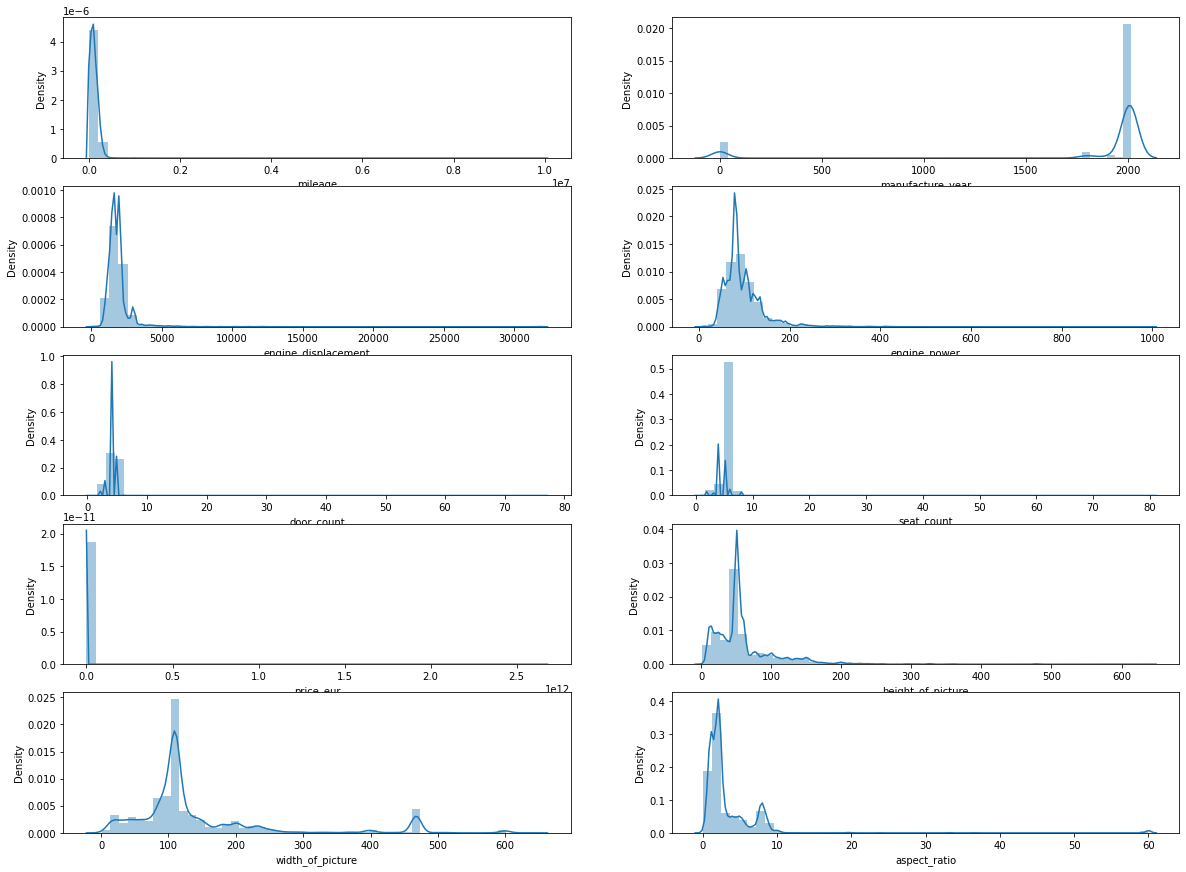

In [27]:
fig, a = plt.subplots(5,2,figsize=(20,15))
sns.distplot(combined_data['mileage'] , ax=a[0,0])
sns.distplot(combined_data['manufacture_year'] , ax=a[0,1])
sns.distplot(combined_data['engine_displacement'] , ax=a[1,0])
sns.distplot(combined_data['engine_power'] , ax=a[1,1])
sns.distplot(combined_data['door_count'] , ax=a[2,0])
sns.distplot(combined_data['seat_count'] , ax=a[2,1])
sns.distplot(combined_data['price_eur'] , ax=a[3,0])
sns.distplot(combined_data['height_of_picture'] , ax=a[3,1])
sns.distplot(combined_data['width_of_picture'] , ax=a[4,0])
sns.distplot(combined_data['aspect_ratio'] , ax=a[4,1])
plt.show()

In [28]:
def remove_outlier(df):
    df['z score'] = scipy.stats.zscore(df['mileage'])
    df.loc[df['z score'] >= 3, 'mileage'] = np.nan
    df = update_missing_values_maker_wise(df, 'mileage',  0)
    df.loc[(df['manufacture_year'] != 0) & (df['manufacture_year'] < 1800), 'manufacture_year'] = np.nan
    df['manufacture_year'].fillna(0, inplace = True) 
    df['z score'] = scipy.stats.zscore(df['engine_displacement'])
    df.loc[df['z score'] >= 3, 'engine_displacement'] = np.nan
    df = update_missing_values_maker_wise(df, 'engine_displacement',  0)
    df['z score'] = scipy.stats.zscore(df['engine_power'])
    df.loc[df['z score'] >= 3, 'engine_power'] = np.nan
    df = update_missing_values_maker_wise(df, 'engine_power',  0)
    df.loc[df['door_count'].astype(int) > 7, 'door_count'] = 4
    df.loc[df['seat_count'].astype(int) > 10, 'seat_count'] = 5

    df['z score'] = scipy.stats.zscore(df['price_eur'])
    df.loc[df['z score'] >= 3, 'price_eur'] = np.nan
    df = update_missing_values_maker_wise(df, 'price_eur',  0)

    df['z score'] = scipy.stats.zscore(df['height_of_picture'].astype(float))
    df.loc[df['z score'] >= 3, 'height_of_picture'] = np.nan

    df['z score'] = scipy.stats.zscore(df['aspect_ratio'].astype(float))
    df.loc[df['z score'] >= 3, 'aspect_ratio'] = np.nan

    df['z score'] = scipy.stats.zscore(df['width_of_picture'].astype(float))
    df.loc[df['z score'] >= 3, 'width_of_picture'] = np.nan

    df['height_of_picture'].fillna(df['height_of_picture'].median(), inplace = True)
    df['width_of_picture'].fillna(df['width_of_picture'].median(), inplace = True)
    df['aspect_ratio'].fillna(df['aspect_ratio'].median(), inplace = True)
    return df

In [29]:
combined_data = remove_outlier(combined_data)

mileage
number
engine_displacement
number
engine_power
number
price_eur
number


## EDA

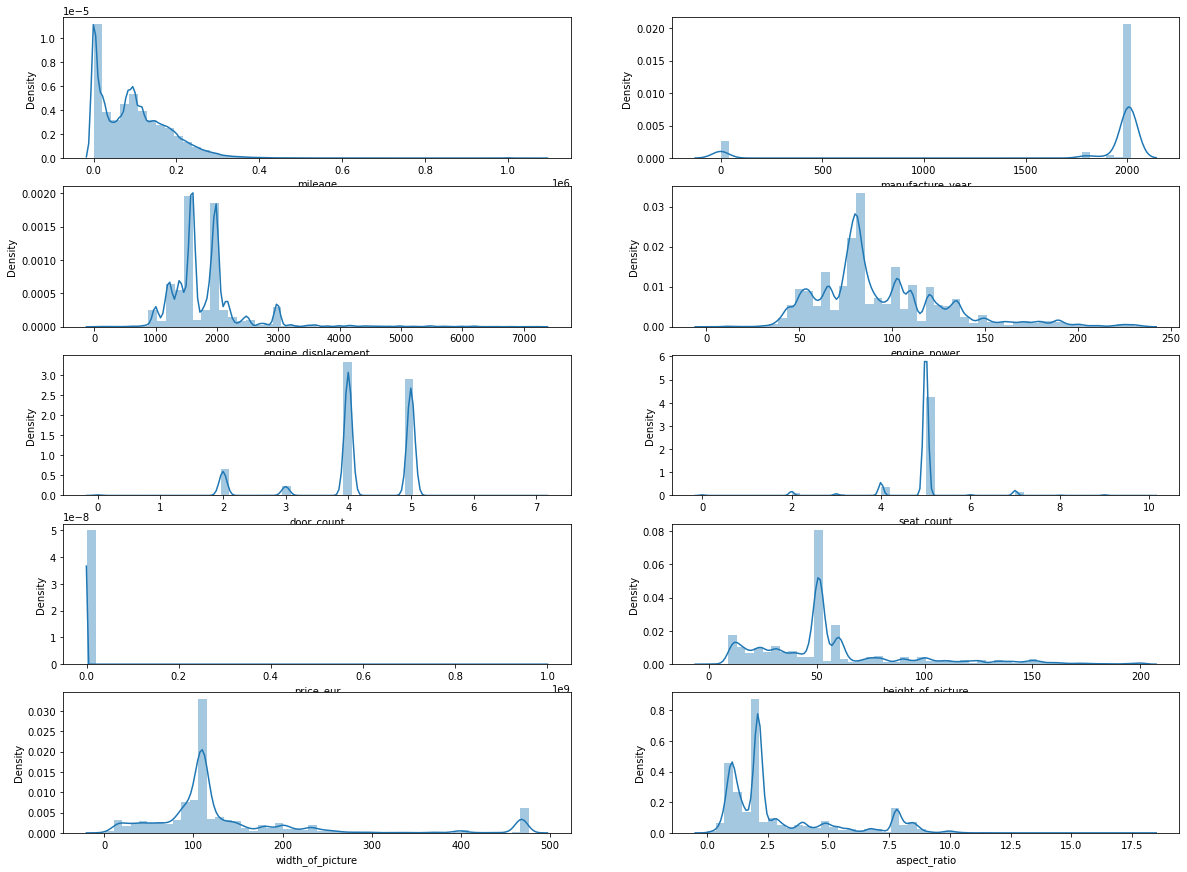

In [30]:
fig, a = plt.subplots(5,2,figsize=(20,15))
sns.distplot(combined_data['mileage'] , ax=a[0,0])
sns.distplot(combined_data['manufacture_year'] , ax=a[0,1])
sns.distplot(combined_data['engine_displacement'] , ax=a[1,0])
sns.distplot(combined_data['engine_power'] , ax=a[1,1])
sns.distplot(combined_data['door_count'] , ax=a[2,0])
sns.distplot(combined_data['seat_count'] , ax=a[2,1])
sns.distplot(combined_data['price_eur'] , ax=a[3,0])
sns.distplot(combined_data['height_of_picture'] , ax=a[3,1])
sns.distplot(combined_data['width_of_picture'] , ax=a[4,0])
sns.distplot(combined_data['aspect_ratio'] , ax=a[4,1])
plt.show()

In [31]:
def get_sold_perc(column):
    df = combined_data[column].value_counts().to_frame()
    df = pd.merge(df, combined_data[combined_data['sold_flag'] == 1][column].value_counts().to_frame(), left_index = True, right_index = True)
    df = pd.merge(df, combined_data[combined_data['sold_flag'] == 0][column].value_counts().to_frame(), left_index = True, right_index = True)
    df.columns = ['Total', 'Sold', 'Not sold']
    df['% Sold'] = df['Sold'] / df['Total']
    return df.sort_values(by = '% Sold', ascending = False)

In [32]:
get_sold_perc('maker')

,Total,Sold,Not sold,% Sold
tesla,39,10,29,0.256410
hummer,148,32,116,0.216216
maserati,385,83,302,0.215584
bentley,240,50,190,0.208333
mazda,9105,1873,7232,0.205711
rover,4126,836,3290,0.202618
honda,5366,1083,4283,0.201826
chevrolet,4141,833,3308,0.201159
mitsubishi,5678,1138,4540,0.200423
ford,48078,9635,38443,0.200404


In [59]:
get_sold_perc('seat_count')

,Total,Sold,Not sold,% Sold
6,2866,587,2279,0.204815
0,2394,480,1914,0.200501
2,16601,3325,13276,0.200289
10,5,1,4,0.200000
4,52511,10455,42056,0.199101
5,605338,119993,485345,0.198225
7,20079,3952,16127,0.196823
1,113,22,91,0.194690
8,1346,259,1087,0.192422
3,6768,1282,5486,0.189421


In [42]:
get_sold_perc('door_count')

,Total,Sold,Not sold,% Sold
1,47,12,35,0.255319
3,24105,4828,19277,0.200290
2,64672,12939,51733,0.200071
5,288814,57356,231458,0.198591
4,331125,65362,265763,0.197394
0,1556,301,1255,0.193445
6,255,38,217,0.149020


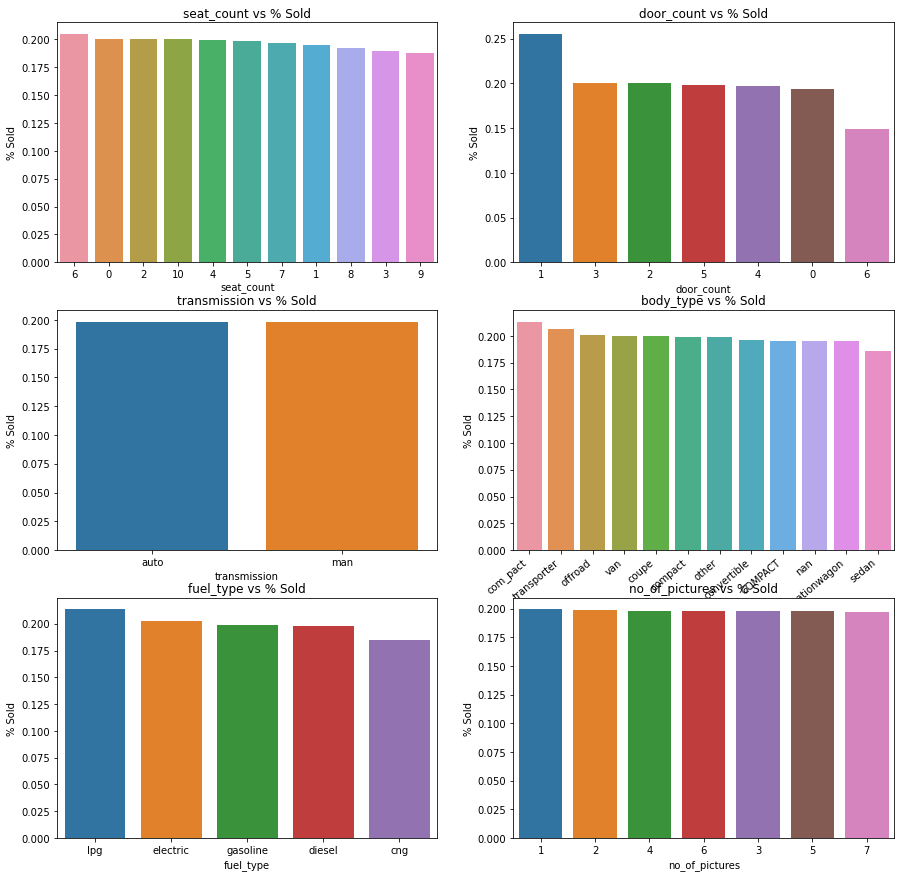

In [61]:
fig, a = plt.subplots(3,2,figsize=(15,15))
d = sns.barplot(x = get_sold_perc('seat_count').index, y = get_sold_perc('seat_count')['% Sold'] , order = get_sold_perc('seat_count').index, ax=a[0,0])
d.set(xlabel='seat_count', title='seat_count vs % Sold')
d = sns.barplot(x = get_sold_perc('door_count').index, y = get_sold_perc('door_count')['% Sold'] , order = get_sold_perc('door_count').index, ax=a[0,1])
d.set(xlabel='door_count', title='door_count vs % Sold')
d = sns.barplot(x = get_sold_perc('transmission').index, y = get_sold_perc('transmission')['% Sold'] , order = get_sold_perc('transmission').index, ax=a[1,0])
d.set(xlabel='transmission', title='transmission vs % Sold')
d = sns.barplot(x = get_sold_perc('body_type').index, y = get_sold_perc('body_type')['% Sold'] , order = get_sold_perc('body_type').index, ax=a[1,1])
d.set_xticklabels(d.get_xticklabels(), rotation=40, ha="right") 
d.set(xlabel='body_type', title='body_type vs % Sold')
d = sns.barplot(x = get_sold_perc('fuel_type').index, y = get_sold_perc('fuel_type')['% Sold'] , order = get_sold_perc('fuel_type').index, ax=a[2,0])
d.set(xlabel='fuel_type', title='fuel_type vs % Sold')
d = sns.barplot(x = get_sold_perc('no_of_pictures').index, y = get_sold_perc('no_of_pictures')['% Sold'] , order = get_sold_perc('no_of_pictures').index, ax=a[2,1])
d.set(xlabel='no_of_pictures', title='no_of_pictures vs % Sold')
plt.show()

1. fuel_type = lpg has more sold %
2. body_type = compact has more sold %
3. door_count = 1 has more sold %

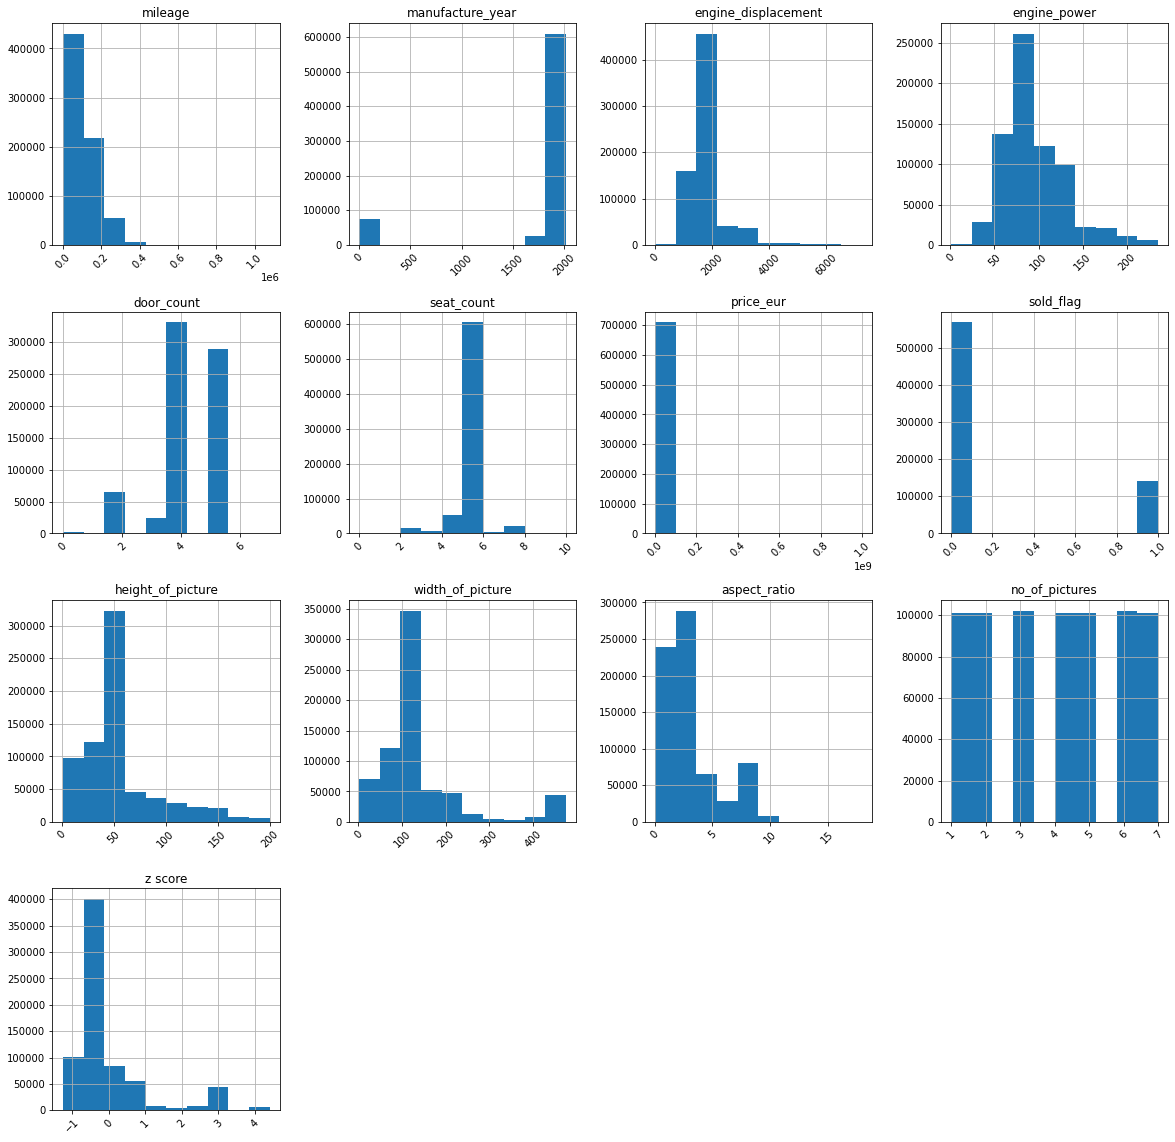

In [62]:
combined_data.hist(figsize=(20,20), xrot=45)
plt.show()

In [63]:
combined_data.describe(include='object')

,maker,model,body_type,transmission,fuel_type,date_created,date_last_seen,test1,test2
count,710582,710582,710582,710582,710582,710582,710582,710582,710582
unique,47,937,12,2,5,710582,671143,710582,671141
top,Unknown maker,Unknown model,other,man,gasoline,2016-02-29 11:59:37.713376+00,2016-01-27 20:40:15.46361+00,2016-02-29 11:59:37.713376+00,2016-01-27 20:40:15.46361+00
freq,103490,226907,553345,535057,379856,1,34190,1,39442


In [64]:
# num_cols = ['price_eur','door_count', 'seat_count', 'engine_power']
# for col in num_cols:
#     sns.boxplot(y = combined_data['sold_flag'].astype('category'), x = col, data=combined_data)
#     plt.show()

In [65]:
for col in combined_data.select_dtypes(include='object'):
    if combined_data[col].nunique() <=30:
        display(pd.crosstab(combined_data['sold_flag'], combined_data[col], normalize='index'))
        #display(pd.crosstab(data['target'], data[col]))

body_type,COMPACT,com_pact,compact,convertible,coupe,nan,offroad,other,sedan,stationwagon,transporter,van
sold_flag,,,,,,,,,,,,
0,0.002213,0.002227,0.063465,0.001520,0.019956,0.090393,0.006408,0.778396,0.005524,0.019895,0.001262,0.008741
1,0.002173,0.002443,0.063826,0.001498,0.020123,0.088649,0.006511,0.780035,0.005091,0.019484,0.001328,0.008840


transmission,auto,man
sold_flag,,
0,0.246935,0.753065
1,0.247344,0.752656


fuel_type,cng,diesel,electric,gasoline,lpg
sold_flag,,,,,
0,0.000309,0.456019,0.007430,0.534210,0.002032
1,0.000284,0.453833,0.007626,0.536028,0.002230


In [66]:
for col in combined_data.select_dtypes(include='object'):
    if combined_data[col].nunique() <= 30:
        display(combined_data.groupby(col)[['mileage', 'engine_displacement', 'engine_power', 'price_eur']].mean())


,mileage,engine_displacement,engine_power,price_eur
body_type,,,,
COMPACT,109376.067007,1847.751117,85.539247,4230.519375
com_pact,111013.956603,1857.267204,86.760074,231675.302201
compact,110220.154569,1861.723819,85.214605,33826.526579
convertible,84393.254410,2177.168059,117.106778,18983.311718
coupe,103321.189559,1598.988102,79.356378,3204.450546
nan,88363.162559,1831.348131,96.917966,16047.563271
offroad,96692.132334,2299.714536,126.065455,1295.340000
other,95421.182570,1832.658519,94.361962,15277.895355
sedan,139277.918349,2180.148939,114.737060,1301.594472


,mileage,engine_displacement,engine_power,price_eur
transmission,,,,
auto,90053.775180,2266.812719,124.855229,22067.289322
man,99923.884129,1692.951300,83.813870,14311.201081


,mileage,engine_displacement,engine_power,price_eur
fuel_type,,,,
cng,108370.425926,1606.180556,81.388889,1295.340000
diesel,104281.505764,1982.340040,104.413562,14868.657034
electric,135235.123893,1866.685698,89.027888,1295.340000
gasoline,91029.535802,1708.542462,85.126730,17659.753068
lpg,131311.311481,1840.544158,90.050951,1295.340000


1. mileage drops in gasoline fuel type but price for gasoline is more
2. engine power is more in diesel fuel type. 
3. for manual transmission the mileage is more but the power and price is less compared to auto
4. price for com_pact body pain is exceedingly high

In [67]:
corr = combined_data.corr()
corr

,mileage,manufacture_year,engine_displacement,engine_power,door_count,seat_count,price_eur,sold_flag,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,z score
mileage,1.000000,0.147551,0.155888,0.008689,0.055093,0.038352,-0.004100,-0.000850,-0.000033,0.001369,0.000072,-0.000396,0.001123
manufacture_year,0.147551,1.000000,0.034770,0.007103,-0.070003,-0.026662,-0.003787,0.001207,-0.000200,0.001156,0.001252,-0.000315,0.001795
engine_displacement,0.155888,0.034770,1.000000,0.608010,-0.058024,0.019486,0.002499,-0.001993,0.000139,0.000602,0.000472,0.002719,0.000882
engine_power,0.008689,0.007103,0.608010,1.000000,-0.068587,0.040063,0.003079,-0.000669,0.001430,0.001122,-0.000325,0.000205,0.000568
door_count,0.055093,-0.070003,-0.058024,-0.068587,1.000000,0.366643,-0.002403,-0.000736,0.001138,0.001146,0.000309,-0.001411,0.000176
seat_count,0.038352,-0.026662,0.019486,0.040063,0.366643,1.000000,-0.000283,-0.001050,-0.000372,-0.000088,0.000105,-0.002138,0.000116
price_eur,-0.004100,-0.003787,0.002499,0.003079,-0.002403,-0.000283,1.000000,-0.000371,0.000747,-0.000769,-0.001176,0.000137,-0.000862
sold_flag,-0.000850,0.001207,-0.001993,-0.000669,-0.000736,-0.001050,-0.000371,1.000000,0.001160,0.000990,0.000218,-0.001335,0.000805
height_of_picture,-0.000033,-0.000200,0.000139,0.001430,0.001138,-0.000372,0.000747,0.001160,1.000000,0.224692,-0.398470,-0.001533,0.183503
width_of_picture,0.001369,0.001156,0.000602,0.001122,0.001146,-0.000088,-0.000769,0.000990,0.224692,1.000000,0.569269,-0.000889,0.908279


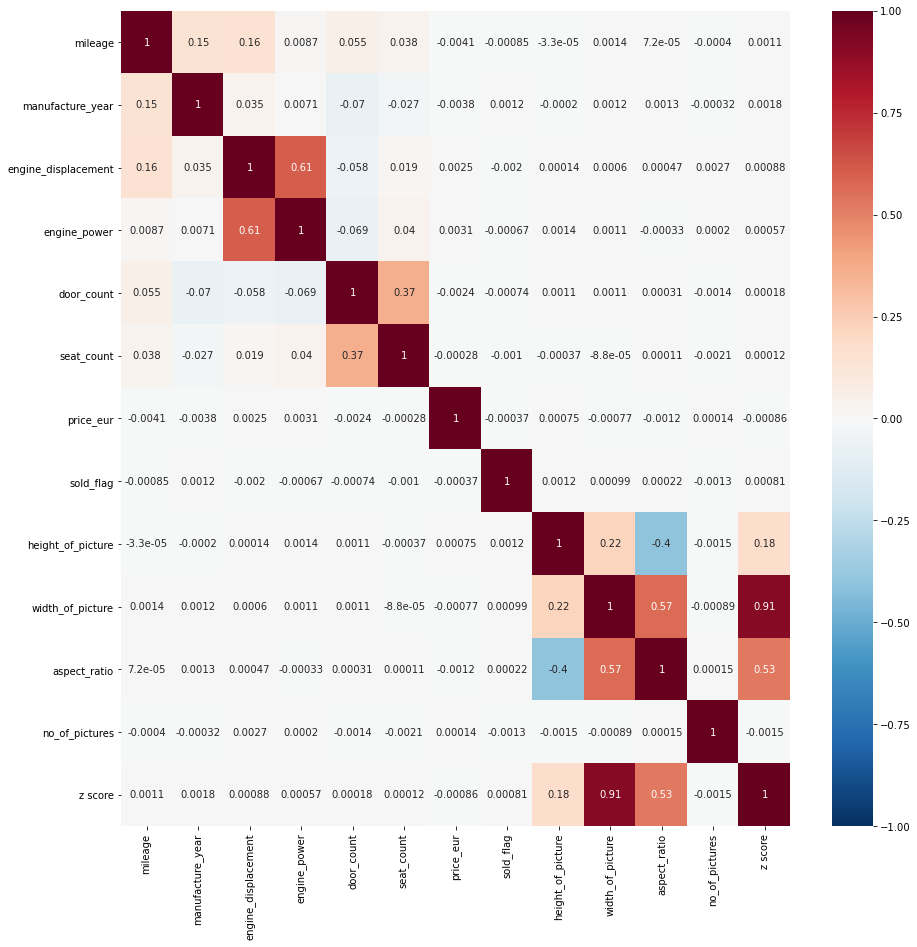

In [68]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

## Split data

In [107]:
X = combined_data.drop(['date_created', 'date_last_seen', 'test1', 'test2', 'z score', 'model', 'sold_flag'], axis = 1)
y = combined_data['sold_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_test_dataset = X_test.copy()

## Encoding

In [108]:
maker = LabelEncoder()
X_train['maker'] = maker.fit_transform(X_train['maker']) 
# model = LabelEncoder()
# X_train['model'] = model.fit_transform(X_train['model']) 
body_type = LabelEncoder()
X_train['body_type'] = body_type.fit_transform(X_train['body_type']) 
transmission = LabelEncoder()
X_train['transmission'] = transmission.fit_transform(X_train['transmission']) 
fuel_type = LabelEncoder()
X_train['fuel_type'] = fuel_type.fit_transform(X_train['fuel_type']) 

In [109]:
X_test['maker'] = maker.transform(X_test['maker']) 
# X_test['model'] = model.transform(X_test['model']) 
X_test['body_type'] = body_type.transform(X_test['body_type']) 
X_test['transmission'] = transmission.transform(X_test['transmission']) 
X_test['fuel_type'] = fuel_type.transform(X_test['fuel_type']) 

## Scaling

In [110]:
scaler = StandardScaler().fit(X_train)

In [111]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

## Upsampling

In [112]:
def upsample_SMOTE(X_train, y_train, ratio=1.0):
    sm = SMOTE(random_state=23, sampling_strategy=ratio)
    X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
    print(len(X_train_sm), len(y_train_sm))
    return X_train_sm, y_train_sm

In [113]:
X_train_sm, y_train_sm = upsample_SMOTE(X_train, y_train)

911802 911802


## To categorical

In [122]:
y_train_c = to_categorical(y_train, num_classes=2)
y_test_c = to_categorical(y_test, num_classes=2)

y_train_sm_c = to_categorical(y_train_sm, num_classes=2)

print("Shape of y_train:", y_train_c.shape)
print("Shape of y_train oversampled:", y_train_sm_c.shape)

Shape of y_train: (568465, 2)
Shape of y_train oversampled: (911802, 2)


In [115]:
# X_train_sm_c, y_train_sm_c = upsample_SMOTE(X_train, y_train_c)

## Get feature importance

In [83]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Feature: maker Score: 0.060553
Feature: mileage Score: 0.162759
Feature: manufacture_year Score: 0.070025
Feature: engine_displacement Score: 0.07507
Feature: engine_power Score: 0.085715
Feature: body_type Score: 0.02614
Feature: transmission Score: 0.013564
Feature: door_count Score: 0.025852
Feature: seat_count Score: 0.016644
Feature: fuel_type Score: 0.016963
Feature: price_eur Score: 0.166051
Feature: height_of_picture Score: 0.062229
Feature: width_of_picture Score: 0.068635
Feature: aspect_ratio Score: 0.07123
Feature: no_of_pictures Score: 0.07857


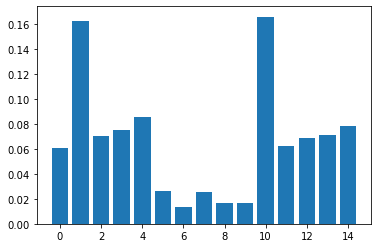

In [84]:
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature:', X.columns[i], 'Score:', round(v, 6))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Model

In [156]:
def confusion_matrix_heatmap(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred, labels=[0, 1])

    df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                      columns = [i for i in ["0","1"]])
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=True ,fmt='g')
    plt.show()

In [159]:
def MLmodel(model, X_train, y_train, X_test, y_test):
    m = model
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    y_pred_prob = m.predict_proba(X_test)
    return y_pred, y_pred_prob, m.score(X_test, y_test)

In [277]:
def curve(y_test, y_pred):
    auc = roc_auc_score(y_test, y_pred)
    print('Classification Report:')
    print(classification_report(y_test,y_pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_pred))

    plt.plot(false_positive_rate, true_positive_rate)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()

## Logistic Regression

In [166]:
y_pred, y_pred_prob, score_lg = MLmodel(LogisticRegression(), X_train, y_train, X_test, y_test)
print(score_lg)

0.8010582829640367


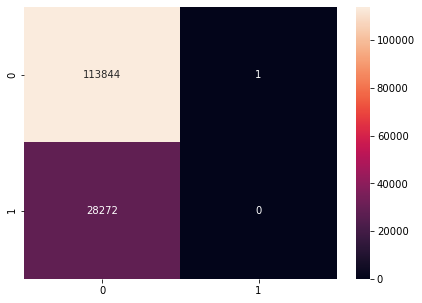

In [167]:
confusion_matrix_heatmap(y_test, y_pred)

In [168]:
y_pred, y_pred_prob, score_lg = MLmodel(LogisticRegression(), X_train_sm, y_train_sm, X_test, y_test)
print(score_lg)

0.4813709830632507


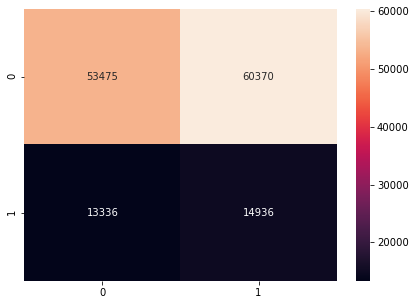

In [169]:
confusion_matrix_heatmap(y_test, y_pred)

## Hyper parameter tuning

In [212]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
param_grid = dict(solver=solvers,penalty=penalty,C=c_values)

In [216]:
gs = GridSearchCV(lr,param_grid,cv=10)
gs.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [217]:
gs.best_params_

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}

In [218]:
gs.cv_results_['mean_test_score']

array([0.50283786, 0.50283786, 0.50283786, 0.50283786, 0.50283786,
       0.50283786, 0.50283786, 0.50283669, 0.50283669, 0.50283786,
       0.50283786, 0.50283552, 0.50282264, 0.50282615, 0.50282264])

In [175]:
y_pred, y_pred_prob, score_lg = MLmodel(LogisticRegression(C= 100, penalty= 'l2', solver= 'lbfgs'), X_train_sm, y_train_sm, X_test, y_test)
print(score_lg)

0.4813709830632507


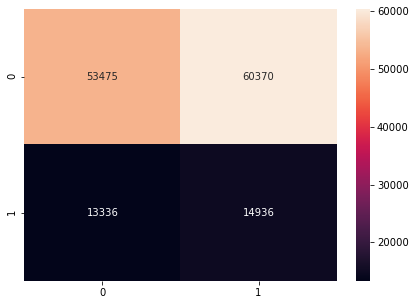

In [176]:
confusion_matrix_heatmap(y_test, y_pred)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.47      0.59    113845
           1       0.20      0.53      0.29     28272

    accuracy                           0.48    142117
   macro avg       0.50      0.50      0.44    142117
weighted avg       0.68      0.48      0.53    142117

ROC_AUC_SCORE is 0.49900707315516984


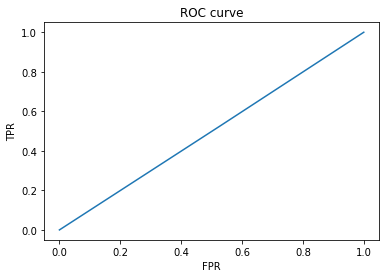

In [281]:
curve(y_test, y_pred)

## Random forest

In [181]:
y_pred_rf, y_pred_prob_rf, score_rf = MLmodel(RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12, verbose = 2), X_train, y_train, X_test, y_test)
print(score_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.7969630656430969


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    5.4s finished


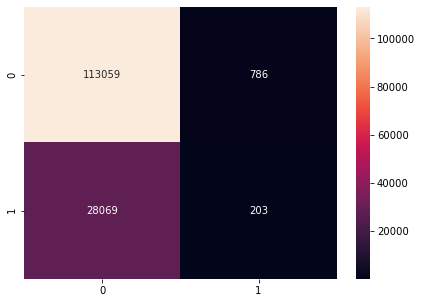

In [182]:
confusion_matrix_heatmap(y_test, y_pred_rf)

In [183]:
y_pred_rf, y_pred_prob_rf, score_rf = MLmodel(RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12, verbose = 2), X_train_sm, y_train_sm, X_test, y_test)
print(score_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.2s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 23.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


0.7781686919932168


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.7s finished


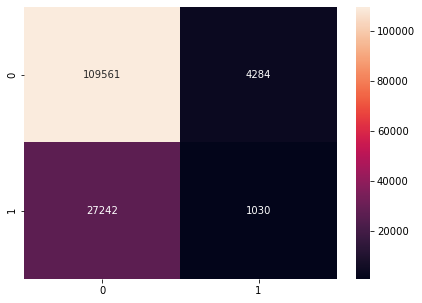

In [184]:
confusion_matrix_heatmap(y_test, y_pred_rf)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.96      0.87    113845
           1       0.19      0.04      0.06     28272

    accuracy                           0.78    142117
   macro avg       0.50      0.50      0.47    142117
weighted avg       0.68      0.78      0.71    142117

ROC_AUC_SCORE is 0.49940084710188


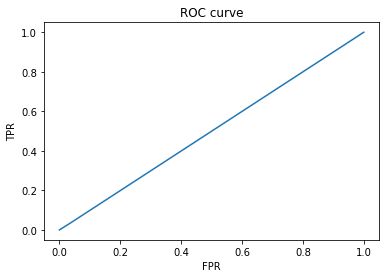

In [280]:
curve(y_test, y_pred_rf)

## Questions

In [71]:
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12, verbose = 2)
rfcl = rfcl.fit(X_train_sm, y_train_sm)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.0s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.2min finished


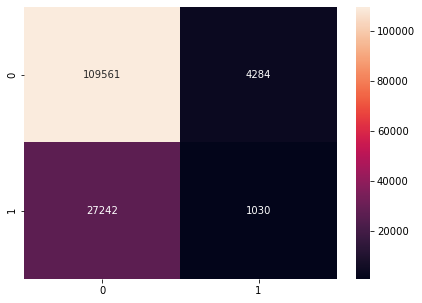

In [257]:
confusion_matrix_heatmap(y_test, y_pred_rf)

#### 1.	Which body type has the highest demand in different seasons (Summer, Winter, rainy, autumn)?

We assume the below
1. Winter (Dec to Feb)
2. Summer (Mar to May)
3. Rainy (Jun to Sep)
4. Autumn (Oct to Nov)

###### We are not able to change it to datetime since there are wrong dates (eg: 2011-02-29 12:15:14 - leap year in 2011 is not correct)

In [185]:
def get_month(s):
#     return datetime.strptime(s.split('.')[0], '%Y-%m-%d %H:%M:%S').month
    return int(s.split('-')[1])

combined_data['date_last_seen_month'] = combined_data['date_last_seen'].apply(get_month)

bins = [0, 2, 5, 9, 11, 12]
labels = ['winter','summer', 'rainy', 'autumn', 'winter']
combined_data['season'] = pd.cut(combined_data['date_last_seen_month'], bins, labels=labels, ordered = False)
# combined_data['body_type'] = combined_data['body_type'].str.strip() # removing white spaces

##### we need to consider only when it is sold to understand the demand and ignore body type = other and null values

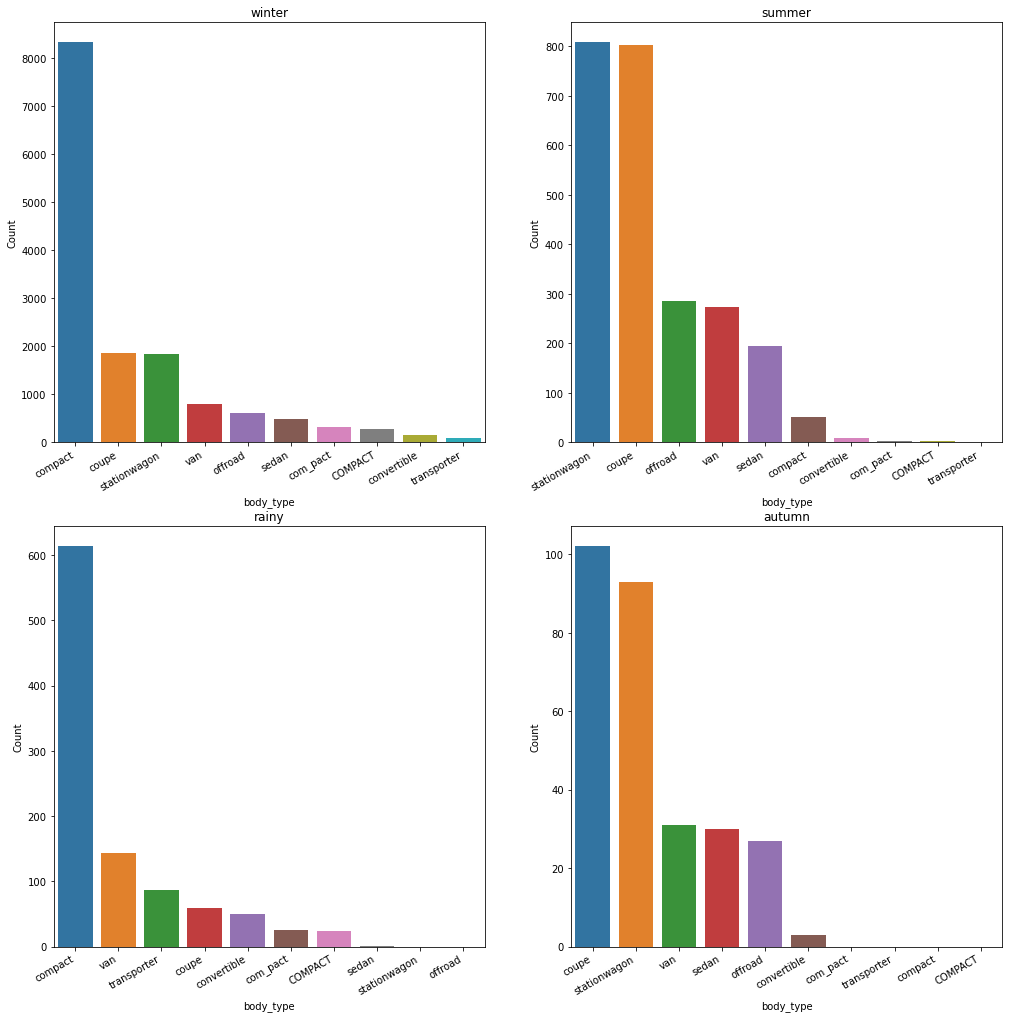

In [186]:
body_type_df = combined_data[combined_data['sold_flag'] == 1].groupby(['season', 'body_type'])['sold_flag'].count().to_frame().reset_index()
body_type_df = body_type_df.sort_values(by = 'sold_flag', ascending = False)
body_type_df_modified = body_type_df[(body_type_df['body_type'] != 'other') & (body_type_df['body_type'] != 'nan')]

plt.figure(figsize=(17, 17))
seasons = ['winter', 'summer', 'rainy', 'autumn']
for i in range(1, 5):
    plt.subplot(2, 2, i)
    sns.barplot(x = 'body_type', y = 'sold_flag', data = body_type_df_modified[body_type_df_modified['season']== seasons[i-1]])
    plt.xlabel('body_type')
    plt.ylabel('Count')
    plt.title(seasons[i-1])
    plt.xticks(rotation=30, ha='right')

##### From the above charts we are able to identify which body type has the highest demand for each seasons after ignoring when the body type ie null/other
1. For Winter and Rainy, compact body type is of highest demand
2. For Summer and Autumn, stationwagen and coupe body types are more in demand

### 2.	In the current inventory, how many cars are highly overpriced? Create your own criteria and explain your approach.

<AxesSubplot:xlabel='price_eur', ylabel='Density'>

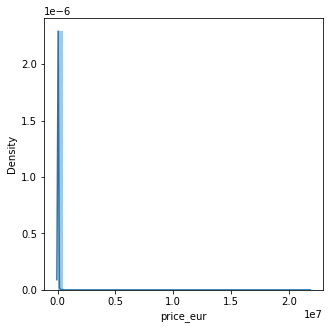

In [187]:
plt.figure(figsize=(5, 5))
sns.distplot(current_inventory_data['price_eur'])

##### Price_eur has outlier and to treat it we are going to use Z score. 

In [188]:
historical_data['price_eur_zscore'] = scipy.stats.zscore(historical_data['price_eur'])
sold_df = historical_data[(historical_data['price_eur_zscore'] < 3) & (historical_data['sold_flag'] == 1)].groupby('maker')['price_eur'].mean().to_frame()
non_sold_df = historical_data[(historical_data['price_eur_zscore'] < 3) & (historical_data['sold_flag'] != 1)].groupby('maker')['price_eur'].mean().to_frame()
historical_data_overprice_df = sold_df.merge(non_sold_df, left_index = True, right_index = True)
historical_data_overprice_df.columns = ['Historical Sold', 'Historical Not Sold']
historical_data_overprice_df['Historical Diff'] = historical_data_overprice_df['Historical Not Sold'] - historical_data_overprice_df['Historical Sold']
historical_data_overprice_df = historical_data_overprice_df.sort_values(by = 'Historical Diff', ascending = False)

In [189]:
current_inventory_data['price_eur_zscore'] = scipy.stats.zscore(current_inventory_data['price_eur'])
sold_df = current_inventory_data[(current_inventory_data['price_eur_zscore'] < 3) & (current_inventory_data['sold_flag'] == 1)].groupby('maker')['price_eur'].mean().to_frame()
non_sold_df = current_inventory_data[(current_inventory_data['price_eur_zscore'] < 3) & (current_inventory_data['sold_flag'] != 1)].groupby('maker')['price_eur'].mean().to_frame()
current_inventory_data_overprice_df = sold_df.merge(non_sold_df, left_index = True, right_index = True)
current_inventory_data_overprice_df.columns = ['current_inventory Sold', 'current_inventory Not Sold']
current_inventory_data_overprice_df['current_inventory Diff'] = current_inventory_data_overprice_df['current_inventory Not Sold'] - current_inventory_data_overprice_df['current_inventory Sold']
current_inventory_data_overprice_df = current_inventory_data_overprice_df.sort_values(by = 'current_inventory Diff', ascending = False)

In [190]:
overprice_df_final = historical_data_overprice_df.merge(current_inventory_data_overprice_df, left_index = True, right_index = True, how = 'outer').sort_values(by = 'current_inventory Diff', ascending = False)

In [191]:
overprice_df_final[((overprice_df_final['Historical Sold'].isna()) | (overprice_df_final['current_inventory Not Sold'] > overprice_df_final['Historical Sold'])) & (overprice_df_final['current_inventory Diff'] > 5000)]

,Historical Sold,Historical Not Sold,Historical Diff,current_inventory Sold,current_inventory Not Sold,current_inventory Diff
maker,,,,,,
rolls-royce,NaN,NaN,NaN,1295.340000,296039.970000,294744.630000
infinity,29885.452105,27253.780244,-2631.671861,1295.340000,38095.000000,36799.660000
rover,27763.851402,29381.433300,1617.581898,20236.703784,32543.213667,12306.509883


In [192]:
maker_list = ['rolls-royce', 'infinity', 'rover']
mean = [296039, 38095, 32543]

In [193]:
overprice_cars_df = pd.DataFrame()
for i, j in zip(maker_list, mean):
    print('Total number of cars overpriced in', i, 'is', current_inventory_data[(current_inventory_data['maker'] == i) & (current_inventory_data['price_eur'] >= j)].shape[0])

Total number of cars overpriced in rolls-royce is 1
Total number of cars overpriced in infinity is 1
Total number of cars overpriced in rover is 64


#### Totally there are 66 cars across 3 makers which are overpriced. Approach used is below
1. Get historical data also to find out if current data is overpriced
2. Get historical sold, not sold, current sold, not sold mean values to compare
3. Since we want only HIGHLY overpriced, the difference between current sold and not sold items mean value should be greater than 5000 (A number identified to work properly) and also current not sold item should be greater than historical sold item

### 3. Estimate how many new listings we can expect per month on the platform over the next 6 months.

In [194]:
combined_data['date_created'][0:10]

0    2017-02-14 17:34:38.809116+00
1    2015-12-02 09:31:25.571302+00
2    2016-02-26 10:59:10.921811+00
3      2016-03-05 11:12:58.5208+00
4    2015-12-18 14:46:32.397086+00
5     2016-02-20 12:04:19.32744+00
6    2016-02-16 13:59:13.654738+00
7    2015-12-19 03:07:28.649984+00
8    2016-02-26 22:10:40.532905+00
9    2016-01-13 18:38:56.066292+00
Name: date_created, dtype: object

In [195]:
def get_month_year(s):
    return int(str(s.split('-')[0]) + str(s.split('-')[1]))

In [196]:
combined_data['date_created_month_year'] = combined_data['date_created'].apply(get_month_year)
ts = combined_data['date_created_month_year'].value_counts().to_frame().sort_index()

In [197]:
data = list(ts['date_created_month_year'])
train_data = list(ts['date_created_month_year'])[:-3]
test_data = list(ts['date_created_month_year'])[-3:]
# fit model
final_diff = []

for p in range(1, 3):
    for q in range(1, 3):
        for d in range(1, 3):
            print(p, q, d)
            model = ARIMA(train_data, order=(p, q, d))
            model_fit = model.fit()
            diff = []

            for i in range(3):
                yhat = model_fit.predict(len(train_data) + i, len(train_data) + i, typ='levels')
                diff.append(abs(yhat - test_data[i]))
            print(diff)
            final_diff.append(sum(diff))
            print(sum(diff))
            

1 1 1
[array([2915.76200922]), array([3132.96680292]), array([17176.76722651])]
[23225.49603865]
1 1 2
[array([25285.61936701]), array([10946.27750351]), array([29719.41806269])]
[65951.31493321]
1 2 1
[array([3424.42449583]), array([13149.33713558]), array([5366.1343843])]
[21939.89601571]
1 2 2
[array([1.45953566]), array([12676.6479247]), array([9171.19457134])]
[21849.30203171]
2 1 1
[array([5157.78060931]), array([16913.76152885]), array([8441.29327439])]
[30512.83541255]
2 1 2
[array([4804.75229287]), array([15613.01281464]), array([1763.23489092])]
[22180.99999844]
2 2 1
[array([10311.91823114]), array([12103.60690825]), array([21666.59087936])]
[44082.11601876]
2 2 2
[array([3416.46926774]), array([13149.80699444]), array([5375.19083033])]
[21941.4670925]


In [198]:
input_date = ['201704', '201705', '201706']
output = []
for i in range(3):
    output.append(model_fit.predict(len(data) + i, len(data) + i, typ='levels'))
print(output)

[array([21326.25900148]), array([22466.64832654]), array([23588.34993224])]


In [199]:
for i in range(3):
    ts.loc[input_date[i], 'date_created_month_year'] = output[i]

In [200]:
ts

,date_created_month_year
201511,54649.000000
201512,145004.000000
201601,77626.000000
201602,175765.000000
201603,102226.000000
201604,867.000000
201605,9848.000000
201606,3190.000000
201607,3171.000000
201608,6132.000000


<AxesSubplot:>

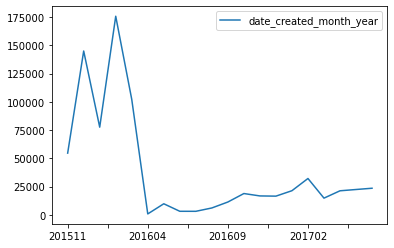

In [201]:
ts.plot()

##### Around 67381 new listings can be expected in the next 3 months

### 4.	How does uploading more photos impact the chance of a car getting sold? 

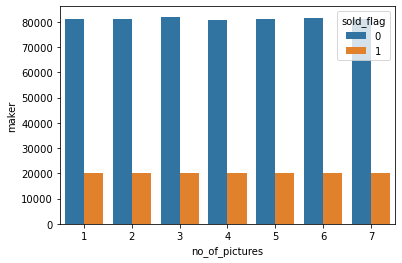

In [202]:
picture_df = combined_data.groupby(['no_of_pictures', 'sold_flag'])['maker'].count().to_frame().reset_index()
sns.barplot(x = 'no_of_pictures', y = 'maker', hue = 'sold_flag', data = picture_df)
plt.show()

##### No noticable difference in uploading 1 or even 7 photos

In [203]:
combined_data[combined_data['sold_flag'] != 1].groupby('maker')['no_of_pictures'].mean()

maker
Unknown maker    3.998820
alfa-romeo       4.071521
aston-martin     5.250000
audi             3.999673
bentley          4.189474
bmw              3.993666
chevrolet        4.044438
chrysler         4.000000
citroen          3.999229
dacia            3.934579
dodge            3.935867
fiat             4.025704
ford             3.993653
honda            4.013308
hummer           3.896552
hyundai          3.986900
infinity         4.095238
isuzu            4.009174
jaguar           3.980528
jeep             4.000000
kia              3.986325
lamborghini      3.976190
lancia           4.022591
land-rover       3.978571
lexus            4.048062
lotus            4.389610
maserati         4.033113
mazda            3.992810
mercedes-benz    4.013999
mini             4.056350
mitsubishi       3.966079
nissan           4.001923
opel             4.014464
peugeot          3.997553
porsche          4.014463
renault          3.977179
rolls-royce      3.375000
rover            4.028267
seat  

In [204]:
combined_data[combined_data['sold_flag'] == 1].groupby('maker')['no_of_pictures'].mean()

maker
Unknown maker    4.004901
alfa-romeo       4.211957
aston-martin     3.000000
audi             4.000605
bentley          3.840000
bmw              4.022736
chevrolet        4.034814
chrysler         3.979827
citroen          3.987080
dacia            4.025974
dodge            4.279330
fiat             4.000755
ford             3.950493
honda            3.998153
hummer           4.281250
hyundai          4.034504
infinity         4.300000
isuzu            3.173913
jaguar           3.973404
jeep             4.070465
kia              3.940709
lamborghini      4.357143
lancia           3.981378
land-rover       4.279412
lexus            4.031646
lotus            3.600000
maserati         4.144578
mazda            4.014415
mercedes-benz    3.986814
mini             3.948148
mitsubishi       4.082601
nissan           3.985889
opel             3.989497
peugeot          3.932949
porsche          4.019348
renault          3.997213
rolls-royce      7.000000
rover            3.848086
seat  

#### Except rolls-royce, there is no noticable difference between uploading photos and not

##  5.	As a quick win, can you create rule-sets using advertisement heuristics which could be applied to filter out Ads which are bad in quality?

1. manufacture_year < 1900
2. door_count > 7
3. seat_count > 12
4. price <= mean * 1.5
5. mileage <= mean * 1.5
6. no_of_pictures = 0
7. maker is NaN
8. fuel_type is NaN

In [209]:
combined_data_copy = combined_data.copy()

In [211]:
filter_ads = combined_data[(combined_data['manufacture_year'] >= 1900) & (combined_data['door_count'].astype(int) <= 7) & (combined_data['seat_count'].astype(int) <= 12) & (combined_data['no_of_pictures'] != 0) & (combined_data['maker'].notnull()) & (combined_data['fuel_type'].notnull()) & (combined_data['mileage'] <= combined_data['mileage'].mean() * 1.5) & (combined_data['price_eur'] <= combined_data['price_eur'].mean() * 1.5)]

In [210]:
filter_ads = combined_data_copy[(combined_data_copy['manufacture_year'] >= 1900) & (combined_data_copy['door_count'].astype(int) <= 7)] # & (combined_data_copy['seat_count'].astype(int) <= 12) & (combined_data_copy['no_of_pictures'] != 0) & (combined_data_copy['maker'].notnull()) & (combined_data_copy['fuel_type'].notnull()) & (combined_data_copy['mileage'] <= combined_data_copy['mileage'].mean() * 1.5) & (combined_data_copy['price_eur'] <= combined_data_copy['price_eur'].mean() * 1.5)]

In [213]:
filter_ads

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,...,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,test1,test2,z score,date_last_seen_month,season,date_created_month_year
0,ford,focus,92000.0,2006.0,1596.0,85.0,coupe,man,5,5,...,51.0,110.0,2.1020,3,2017-02-14 17:34:38.809116+00,2017-02-14 17:34:38.809116+00,-0.292278,2,winter,201702
1,Unknown maker,Unknown model,22000.0,2013.0,1560.0,85.0,other,man,4,5,...,62.0,88.0,1.4193,6,2015-12-02 09:31:25.571302+00,2015-12-14 05:16:59.23886+00,-0.487680,12,winter,201512
2,volkswagen,polo,29680.0,2013.0,1197.0,66.0,other,man,5,5,...,51.0,110.0,2.1020,4,2016-02-26 10:59:10.921811+00,2016-07-03 19:25:35.777411+00,-0.292278,7,rainy,201602
3,skoda,Unknown model,22100.0,2015.0,1598.0,66.0,other,auto,5,5,...,30.0,100.0,3.3333,5,2016-03-05 11:12:58.5208+00,2016-07-03 17:38:05.783742+00,-0.381097,7,rainy,201603
4,ford,transit,57690.0,2010.0,2198.0,63.0,other,man,4,3,...,23.0,26.0,1.1304,7,2015-12-18 14:46:32.397086+00,2016-02-16 15:00:04.57898+00,-1.038359,2,winter,201512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24981,jeep,cherokee,10.0,2001.0,2500.0,89.0,compact,man,5,5,...,11.0,94.0,8.5454,1,2016-01-08 21:30:10.316875+00,2016-01-19 15:08:06.246575+00,-0.434389,1,winter,201601
24982,renault,megane,100.0,1999.0,1900.0,79.0,other,man,5,5,...,60.0,468.0,7.8000,6,2016-11-11 19:17:38.141529+00,2016-11-15 07:07:08.612741+00,2.887449,11,autumn,201611
24985,Unknown maker,Unknown model,1.0,2015.0,1560.0,55.0,other,man,4,5,...,51.0,110.0,2.1020,3,2015-12-11 03:20:42.576632+00,2016-01-19 03:09:14.709765+00,-0.292278,1,winter,201512
24991,nissan,qashqai,135900.0,2011.0,1461.0,81.0,other,man,4,5,...,51.0,110.0,2.1020,5,2016-02-25 03:48:38.928994+00,2016-07-03 19:19:32.371952+00,-0.292278,7,rainy,201602


In [212]:
filter_ads.shape

(375245, 25)

## 6. What are the top 3 features that you have created using the columns given in the data? What is your criteria of choosing Top 3 features?

In [215]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Feature: maker Score: 0.053125
Feature: mileage Score: 0.168175
Feature: manufacture_year Score: 0.080878
Feature: engine_displacement Score: 0.071512
Feature: engine_power Score: 0.083961
Feature: body_type Score: 0.026971
Feature: transmission Score: 0.01287
Feature: door_count Score: 0.027034
Feature: seat_count Score: 0.014522
Feature: fuel_type Score: 0.015046
Feature: price_eur Score: 0.178593
Feature: height_of_picture Score: 0.057671
Feature: width_of_picture Score: 0.062206
Feature: aspect_ratio Score: 0.068319
Feature: no_of_pictures Score: 0.079117


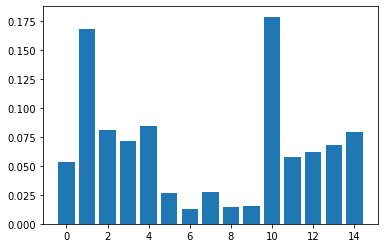

In [217]:
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature:', X.columns[i], 'Score:', round(v, 6))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Based on Decision tree model, we have identified these 3 as top features. Also by EDA we were able to identify the same
1. mileage
2. price_eur
3. engine_power    


## 7.	Create a Deep Learning Model (using architecture, platform & framework of your choice), to create a ranked list of advertisements in the current inventory which could help the company maximize their revenue.

## NN

In [221]:
model = Sequential()
model.add(Dense(50, input_dim=15 , activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(50, activation = 'sigmoid'))
model.add(Dense(9, activation = 'sigmoid'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [220]:
X_train_sm.shape

(911802, 15)

In [222]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 5, verbose = 1)

Epoch 1/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6940 - accuracy: 0.5001
Epoch 2/5
4560/4560 [==============================] - 11s 2ms/step - loss: 0.6931 - accuracy: 0.5018
Epoch 3/5
4560/4560 [==============================] - 11s 2ms/step - loss: 0.6930 - accuracy: 0.5038
Epoch 4/5
4560/4560 [==============================] - 11s 2ms/step - loss: 0.6930 - accuracy: 0.5039
Epoch 5/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6929 - accuracy: 0.5035


#### Add weight initializer

In [223]:
model = Sequential()
model.add(Dense(50, input_dim = 15, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(9, activation = 'sigmoid', kernel_initializer = 'he_normal'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [224]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 5, verbose = 1)

Epoch 1/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6935 - accuracy: 0.5009
Epoch 2/5
4560/4560 [==============================] - 15s 3ms/step - loss: 0.6932 - accuracy: 0.5017
Epoch 3/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6931 - accuracy: 0.5035
Epoch 4/5
4560/4560 [==============================] - 14s 3ms/step - loss: 0.6929 - accuracy: 0.5053
Epoch 5/5
4560/4560 [==============================] - 15s 3ms/step - loss: 0.6929 - accuracy: 0.5057


### Change activation function

In [225]:
model = Sequential()
model.add(Dense(50, input_dim = 15, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(9, activation = 'relu'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [226]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 5, verbose = 1)

Epoch 1/5
4560/4560 [==============================] - 14s 3ms/step - loss: 0.6933 - accuracy: 0.5012
Epoch 2/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6930 - accuracy: 0.5058
Epoch 3/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6930 - accuracy: 0.5075
Epoch 4/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6929 - accuracy: 0.5083
Epoch 5/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6929 - accuracy: 0.5094


### Add kernel initializer

In [237]:
model = Sequential()
model.add(Dense(50, input_dim = 15, activation = 'relu'))
model.add(Dense(50, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(50, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(9, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(Dense(2, activation="softmax", kernel_initializer = 'he_normal'))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [238]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 5, verbose = 1)

Epoch 1/5
4560/4560 [==============================] - 14s 3ms/step - loss: 0.6943 - accuracy: 0.5030
Epoch 2/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6930 - accuracy: 0.5079
Epoch 3/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6927 - accuracy: 0.5101
Epoch 4/5
4560/4560 [==============================] - 13s 3ms/step - loss: 0.6926 - accuracy: 0.5121
Epoch 5/5
4560/4560 [==============================] - 14s 3ms/step - loss: 0.6924 - accuracy: 0.5135


### Add batch normalization

In [233]:
model = Sequential()
model.add(Dense(50, input_dim = 15, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(9, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [234]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 5, verbose = 1)

Epoch 1/5
4560/4560 [==============================] - 37s 8ms/step - loss: 0.6992 - accuracy: 0.5036
Epoch 2/5
4560/4560 [==============================] - 36s 8ms/step - loss: 0.6932 - accuracy: 0.5058
Epoch 3/5
4560/4560 [==============================] - 35s 8ms/step - loss: 0.6930 - accuracy: 0.5072
Epoch 4/5
4560/4560 [==============================] - 37s 8ms/step - loss: 0.6929 - accuracy: 0.5081
Epoch 5/5
4560/4560 [==============================] - 36s 8ms/step - loss: 0.6928 - accuracy: 0.5093


### Add Dropout

In [235]:
model = Sequential()
model.add(Dense(50, input_dim = 15, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(9, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [236]:
model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 3, verbose = 1, validation_data=(X_test, y_test_c))

Epoch 1/3
4560/4560 [==============================] - 19s 4ms/step - loss: 0.6949 - accuracy: 0.5004 - val_loss: 0.6918 - val_accuracy: 0.8011
Epoch 2/3
4560/4560 [==============================] - 18s 4ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6902 - val_accuracy: 0.8011
Epoch 3/3
4560/4560 [==============================] - 18s 4ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6937 - val_accuracy: 0.1989


### Final NN Model

In [262]:
model = Sequential()
model.add(Dense(50, input_dim = 15, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(9, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dense(2, activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [264]:
history = model.fit(X_train_sm, y_train_sm_c, batch_size = 200, epochs = 30, verbose = 1, validation_data=(X_test, y_test_c))

Epoch 1/30
4560/4560 [==============================] - 49s 10ms/step - loss: 0.7023 - accuracy: 0.5054 - val_loss: 0.6807 - val_accuracy: 0.5873
Epoch 2/30
4560/4560 [==============================] - 46s 10ms/step - loss: 0.6933 - accuracy: 0.5079 - val_loss: 0.6928 - val_accuracy: 0.5142
Epoch 3/30
4560/4560 [==============================] - 44s 10ms/step - loss: 0.6928 - accuracy: 0.5088 - val_loss: 0.6912 - val_accuracy: 0.5401
Epoch 4/30
4560/4560 [==============================] - 44s 10ms/step - loss: 0.6926 - accuracy: 0.5113 - val_loss: 0.6816 - val_accuracy: 0.6587
Epoch 5/30
4560/4560 [==============================] - 44s 10ms/step - loss: 0.6924 - accuracy: 0.5126 - val_loss: 0.6958 - val_accuracy: 0.4658
Epoch 6/30
4560/4560 [==============================] - 44s 10ms/step - loss: 0.6923 - accuracy: 0.5142 - val_loss: 0.6958 - val_accuracy: 0.4607
Epoch 7/30
4560/4560 [==============================] - 45s 10ms/step - loss: 0.6921 - accuracy: 0.5149 - val_loss: 0.6900 -

In [265]:
predictions = np.argmax(model.predict(X_test),axis=1)

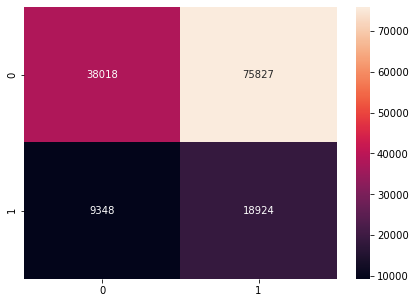

In [266]:
confusion_matrix_heatmap(y_test, predictions)

## 8.	How did you measure the accuracy of your model? How did you identify that your model didn’t under/ over fit? Please share some visualizations and your interpretation/findings from the same.

In [267]:
precision, recall, fscore, support = score(y_test, predictions)

In [268]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.80264325 0.19972349]
recall: [0.33394528 0.66935484]
fscore: [0.47165516 0.30764979]
support: [113845  28272]


In [269]:
sold_probability = model.predict(X_test)

sold_out = []
for i in sold_probability:
    sold_out.append(i[1])

In [270]:
X_test_dataset['Rank'] = sold_out
X_test_dataset['Sold_flag'] = y_test
X_test_dataset['Predicted_flag'] = np.argmax(sold_probability, axis=-1)

In [271]:
# maker = LabelEncoder()
# combined_data['maker'] = maker.inverse_transform(combined_data['maker']) 
# model = LabelEncoder()
# combined_data['model'] = model.inverse_transform(combined_data['model']) 
# body_type = LabelEncoder()
# combined_data['body_type'] = body_type.inverse_transform(combined_data['body_type']) 
# transmission = LabelEncoder()
# combined_data['transmission'] = transmission.inverse_transform(combined_data['transmission']) 
# fuel_type = LabelEncoder()
# combined_data['fuel_type'] = fuel_type.inverse_transform(combined_data['fuel_type']) 

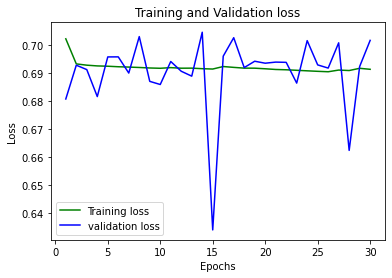

In [273]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

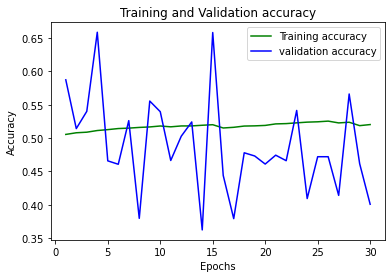

In [274]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,31)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 9.	Suppose, till now, the company was ranking the advertisements in a descending order on the basis of date_last_seen, so can you demonstrate the lift in performance of your model as compared to the current ranking criteria?

In [275]:
X_test_dataset = X_test_dataset.sort_values(by = 'Rank', ascending = False)

In [276]:
X_test_dataset

,maker,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,Rank,Sold_flag,Predicted_flag
679500,Unknown maker,999999.0,1938.0,1598.0,81.0,other,auto,4,4,gasoline,5.502036e+04,20.0,10.0,0.5000,2,7.438117e-01,0,1
242288,Unknown maker,1051056.0,2003.0,1598.0,81.0,other,man,4,2,diesel,1.295340e+03,51.0,110.0,2.1020,6,6.868603e-01,0,1
559553,volvo,986000.0,2008.0,1997.0,120.0,other,man,4,0,diesel,1.295340e+03,51.0,110.0,2.1020,2,6.815995e-01,0,1
226144,volvo,1060000.0,2010.0,1997.0,120.0,compact,auto,4,5,gasoline,1.980015e+04,51.0,110.0,2.1020,3,6.782632e-01,0,1
43553,skoda,1060000.0,2010.0,1598.0,77.0,compact,man,5,5,gasoline,6.291270e+03,51.0,110.0,2.1020,2,6.722592e-01,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233951,Unknown maker,80700.0,0.0,1598.0,81.0,compact,man,4,5,gasoline,2.736537e+07,16.0,16.0,1.0000,6,3.709550e-03,0,0
565116,Unknown maker,80700.0,0.0,1598.0,81.0,compact,man,4,5,gasoline,2.607002e+07,55.0,460.0,8.3636,7,3.397537e-03,0,0
518676,opel,90901.0,0.0,1598.0,81.0,compact,man,4,5,gasoline,2.694747e+07,16.0,106.0,6.6250,1,2.585317e-03,0,0
179262,opel,150000.0,1992.0,1598.0,81.0,other,man,4,5,gasoline,1.000888e+08,51.0,110.0,2.1020,3,7.983497e-09,0,0


## 10.	Can you explain in a step-by-step manner, how you performed various iterations and what impact did it have on the model accuracy?

1. Read the data and update the missing values
2. Treat the outliers
3. Encoding the data
4. Split the data into train and test (Also val if required)
5. Scale the data
6. Since the dataset is imbalance, we need to upscale the data
7. Build Logistic regression model and with tuning we calcualte the accuracy
8. Also we build NN model step by step
    a. Add weight initializer and see if the accuracy increases
    b. Change activation function
    c. add Batch normalization
    d. Add drop out
9. Train for 50 epochs and plot for training loss and validation loss and see the graph
10. find optimum numbers of Epochs and retrain it.